In [1]:
# importing all the necessary libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

### Opening and basic operations on data

In [3]:
file='C:/Users/testi/OneDrive/Desktop/Fraud/Fraud.csv'
df=pd.read_csv(file)    #reading the dataset into a dataframe

In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
df.info() #checking the data type of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
df.isnull().sum(axis=0) #checking for null vales in the dataframe

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [26]:
df.isFraud.value_counts() # fraud and non fraud customer figures

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
df.isFlaggedFraud.value_counts() # flagged fraud and non fraud customer figures

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

### Exploratory Data Analysis

In [77]:
num=df.select_dtypes(include=np.number) # seperating the numeric values into a dataframe

<Axes: xlabel='type', ylabel='count'>

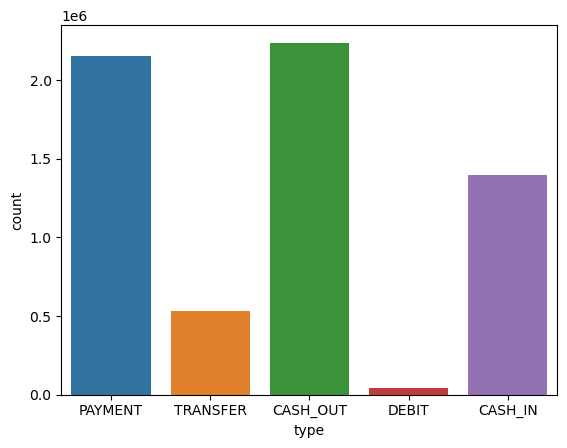

In [43]:
sns.countplot(x=df.type) # most frequent kind of transaction

In [82]:
df1 = df.groupby('type').mean()['amount']

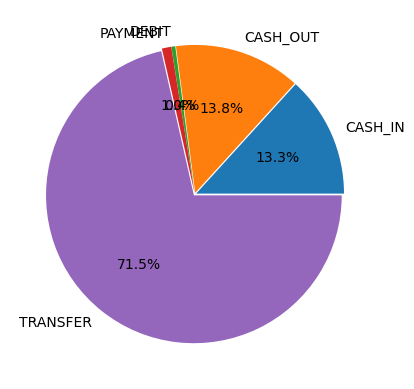

In [83]:
plt.pie(df1,labels=df1.index,autopct="%1.1f%%",explode=(0.01,0.01,0.01,0.01,0.01))
plt.show()

In [84]:
df2=df.groupby(['type','isFraud']).count()

In [85]:
df2

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

<Axes: >

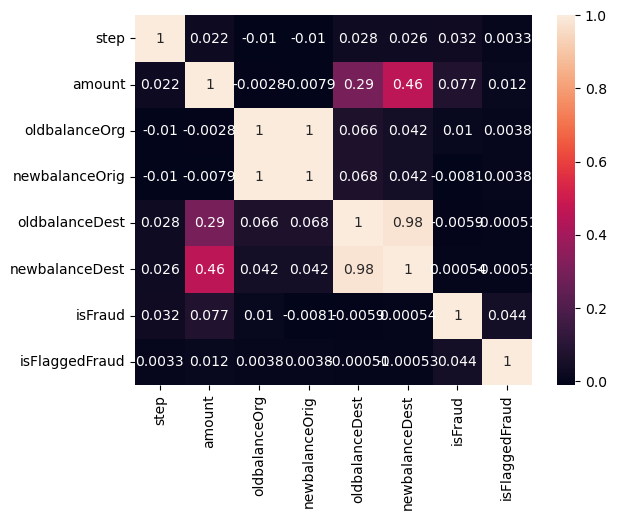

In [80]:
sns.heatmap(num.corr(),annot=True) #finding the correlation

### Preparing data

In [79]:
cat=df.select_dtypes(include='object') # seperating the objects values into a dataframe

In [87]:
num.drop(['newbalanceOrig','newbalanceDest'],axis=1,inplace=True) 
#dropping the coloumns because they are highly correlated and convey the same meaning

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [89]:
cat.drop(['nameOrig','nameDest'],axis=1,inplace=True) #dropping unwanted columns

In [91]:
from sklearn.preprocessing import LabelEncoder #encoding the categorical column
le=LabelEncoder()
cat.type=le.fit_transform(cat.type)

In [93]:
fin=pd.concat([num,cat],axis=1) #concating the numerical and categorical

<Axes: xlabel='isFraud', ylabel='count'>

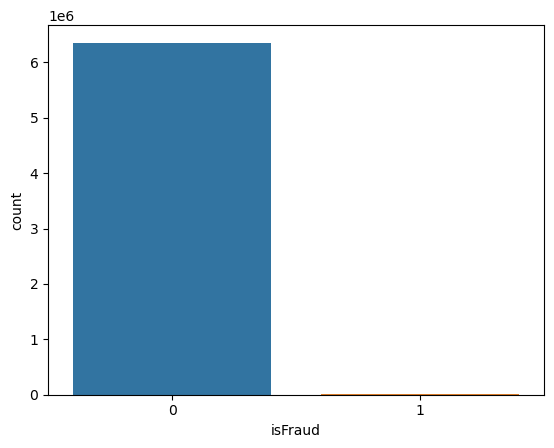

In [105]:
sns.countplot(x=fin.isFraud) #class imbalance 

### Splitting data

In [107]:
X=fin.drop('isFraud',axis=1)
y=fin.isFraud               #splitting the independent and dependent variables

In [108]:
from imblearn.over_sampling import SMOTE #importing SMOTE to counteract class imbalance

In [109]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) #fitting SMOTE on the data

<Axes: xlabel='isFraud', ylabel='count'>

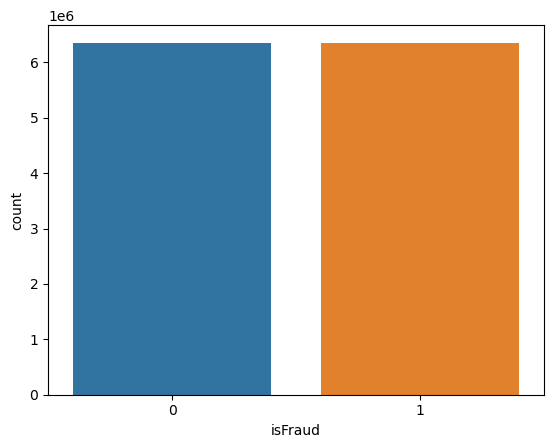

In [110]:
sns.countplot(x=y) # class imbalance checking

In [96]:
from sklearn.model_selection import train_test_split #importing train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 13) #splitting the data

### Model building

In [99]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

In [112]:
lr = LogisticRegression() #fitting the data
lr.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred = lr.predict(X_test) #predicting fradulance

In [118]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score #importing performace parameters

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91   1906128
           1       0.91      0.90      0.91   1906517

    accuracy                           0.91   3812645
   macro avg       0.91      0.91      0.91   3812645
weighted avg       0.91      0.91      0.91   3812645



In [119]:
accu = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)         #other performance paramters
print(f"Accuracy of logistic regression {accu}")
print(f"Precision of logistic regression {prec}")
print(f"Recall of logistic regression {recall}") 

Accuracy of logistic regression 0.9067912171209226
Precision of logistic regression 0.9130498228392271
Recall of logistic regression 0.8992361463338643


<Axes: >

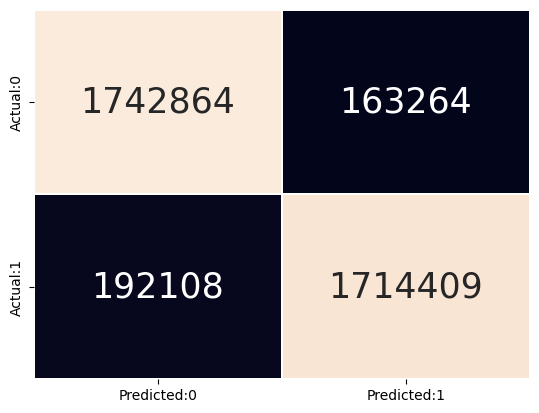

In [120]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

In [121]:
from sklearn.naive_bayes import GaussianNB #importing gaussiannb classification
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [122]:
y_pred = gb.predict(X_test) #predicting fradulance

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77   1906128
           1       0.92      0.47      0.62   1906517

    accuracy                           0.71   3812645
   macro avg       0.78      0.71      0.69   3812645
weighted avg       0.78      0.71      0.69   3812645



In [124]:
accu = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)         #other performance paramters
print(f"Accuracy of logistic regression {accu}")
print(f"Precision of logistic regression {prec}")
print(f"Recall of logistic regression {recall}") 

Accuracy of logistic regression 0.712222354821915
Precision of logistic regression 0.9195274553814414
Recall of logistic regression 0.4652169374833794


<Axes: >

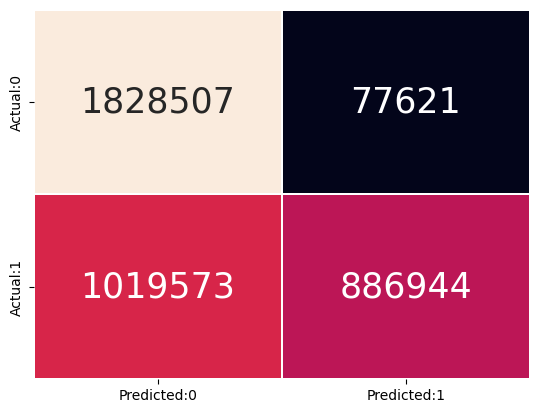

In [125]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [134]:
ab=AdaBoostClassifier(n_estimators=1,learning_rate=0.1)
ab.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1)

In [135]:
y_pred = ab.predict(X_test) #predicting fradulance

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75   1906128
           1       0.73      0.87      0.79   1906517

    accuracy                           0.77   3812645
   macro avg       0.78      0.77      0.77   3812645
weighted avg       0.78      0.77      0.77   3812645



In [137]:
accu = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)         #other performance paramters
print(f"Accuracy of logistic regression {accu}")
print(f"Precision of logistic regression {prec}")
print(f"Recall of logistic regression {recall}") 

Accuracy of logistic regression 0.7718819874391663
Precision of logistic regression 0.7278263605847282
Recall of logistic regression 0.8686431854528441


<Axes: >

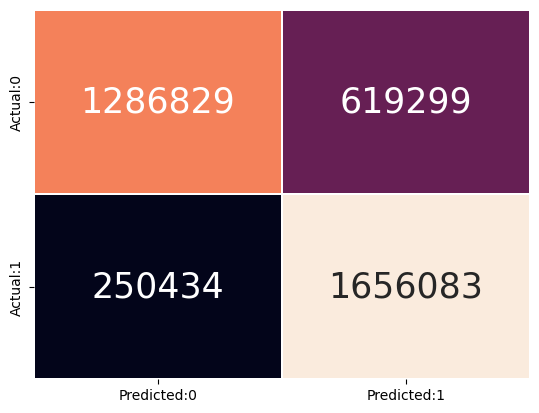

In [138]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

In [146]:
from xgboost import XGBClassifier

In [147]:
xgb=XGBClassifier(random_state=10,n_jobs=-1,max_depth=3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=10, ...)

In [148]:
y_pred = xgb.predict(X_test) #predicting fradulance

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906128
           1       0.99      1.00      0.99   1906517

    accuracy                           0.99   3812645
   macro avg       0.99      0.99      0.99   3812645
weighted avg       0.99      0.99      0.99   3812645



In [150]:
accu = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)         #other performance paramters
print(f"Accuracy of logistic regression {accu}")
print(f"Precision of logistic regression {prec}")
print(f"Recall of logistic regression {recall}") 

Accuracy of logistic regression 0.9946813826097106
Precision of logistic regression 0.991685673844646
Recall of logistic regression 0.9977288427011142


<Axes: >

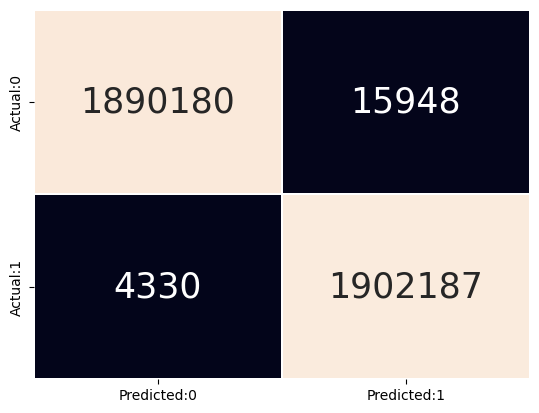

In [151]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})